In [1]:
def dem_cap(weeks_epi,weeks_off,weeks_total,baseline_demand,baseline_capacity,
            cr,rr,cap_exp,dr_ep,dr_norm):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    demand = baseline_demand
    out_list = []

    weeks = list(np.arange(1,weeks_total+1,1))

    df_rec = pd.DataFrame(columns = ['ID', 'WAIT'])
    
    for week in weeks:
        
        if week <= weeks_epi:
            demand = demand*(1-(dr_ep))
        #if week > weeks_epi:
            #demand = demand*(1-(dr_norm))    
        if week > weeks_epi:
            demand = demand+(cr*(week - weeks_epi)*baseline_demand)
            if demand >= baseline_demand:
                demand = baseline_demand
        if demand < 0:
            demand = 0

            
        if week <= weeks_off:
            capacity = 0
        if week > weeks_off:
            capacity = rr*(week - weeks_off)*baseline_capacity
            if capacity >= baseline_capacity*(cap_exp+1):
                capacity = baseline_capacity*(cap_exp+1)

        df_week = pd.DataFrame(columns = ['ID', 'WAIT'])
        df_week['ID'] = list(np.arange(1,demand+1,1))
        df_week['ID'] = df_week['ID'].astype(str)
        df_week['ID'] = str(week)+'_'+df_week['ID']
        df_week['WAIT'] = 0

        df_rec = pd.concat([df_rec,df_week])
        df_rec = df_rec.sort_values('WAIT', ascending = False)
        df_rec['ORDER'] = list(np.arange(1,len(df_rec)+1,1))
        df_rec = df_rec.loc[df_rec['ORDER'] > capacity]
        del df_rec['ORDER']
        df_rec['WAIT'] = df_rec['WAIT']+1
        pat_rem = len(df_rec)
        if pat_rem == 0:
            median_wait = 0
            mean_wait = 0
        else:
            median_wait = np.median(df_rec['WAIT'])
            mean_wait = np.mean(df_rec['WAIT'])        
                
        out = (week,demand,capacity, pat_rem, median_wait,mean_wait)
        out_list.append(out)

    df_out= pd.DataFrame(out_list, columns = ['WEEK', 'DEMAND', 'CAPACITY', 
                                    'REMAINING', 'MEDIAN_WAIT', 'MEAN_WAIT'])

    plt.figure(figsize = (12,6))
    plt.plot(df_out['WEEK'], df_out['DEMAND'])
    plt.plot(df_out['WEEK'], df_out['CAPACITY'])
    plt.ylim(bottom = 0)
    plt.ylim(top = 1.1*np.max(list(df_out['DEMAND'])+list(list(df_out['CAPACITY']))))
    plt.ylabel('Activity per Week')
    plt.xlabel('Weeks from today')
    plt.show()
    
    plt.figure(figsize = (12,6))
    plt.plot(df_out['WEEK'], df_out['REMAINING'])
    plt.ylim(bottom = 0)
    plt.ylim(top = 1.1*np.max(list(df_out['REMAINING'])))
    plt.ylabel('Patients Remaining')
    plt.xlabel('Weeks from today')
    plt.show()

    plt.figure(figsize = (12,6))
    plt.plot(df_out['WEEK'], df_out['MEDIAN_WAIT'])
    plt.plot(df_out['WEEK'], df_out['MEAN_WAIT'])
    plt.ylim(bottom = 0)
    plt.ylim(top = 1.1*np.max(list(df_out['MEAN_WAIT'])+list(list(df_out['MEDIAN_WAIT']))))
    plt.ylabel('Wait time')
    plt.xlabel('Weeks from today')
    plt.show()

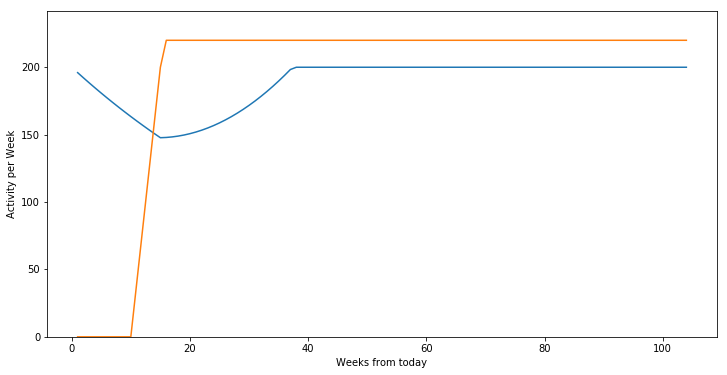

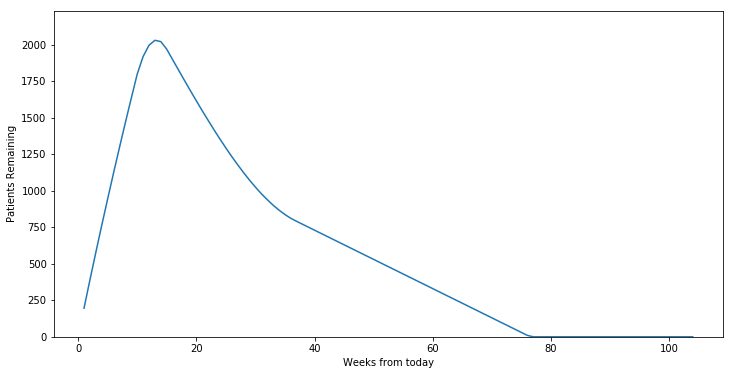

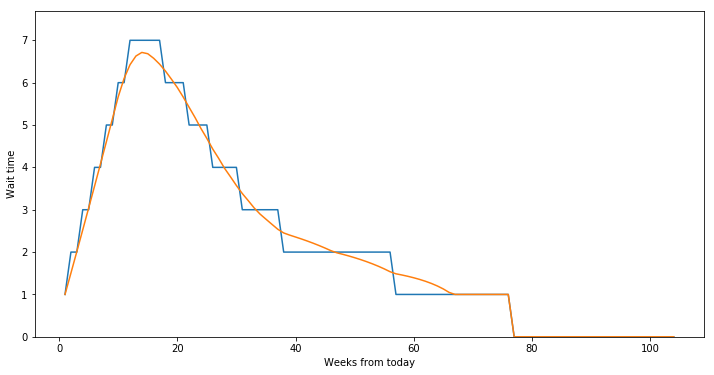

In [2]:
dem_cap(15,10,104,200,200,0.001,0.2,0.1,0.02,0.005)